In [ ]:
# page画像の回転を試す
# test image として、ここに 008_0.jpeg

In [1]:
KAITEN_DIR = 'Z:/knbnk/data/kaiten'

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
img = cv2.imread(KAITEN_DIR+'/008_0.jpeg', 0)

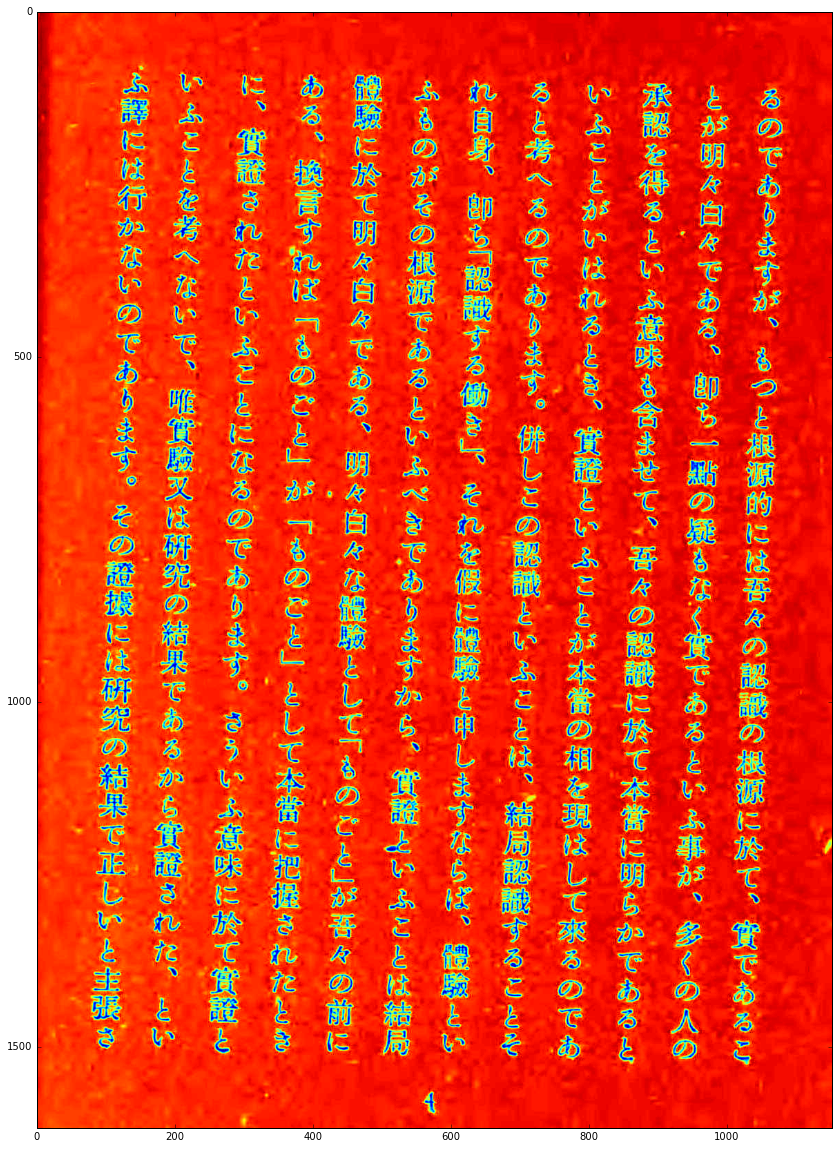

In [11]:
plt.figure(figsize=(20,20))
plt.imshow(np.asarray(img))
plt.show()

In [9]:
print(img.dtype)
print(img.shape)

uint8
(1618, 1153)


In [ ]:
# bitwise_not, threshold to_zero の組み合わせでノイズ除去する

In [15]:
img_bw_not = cv2.bitwise_not(img)
max_value = 255
thresh_under = 55
ret, img_bw_not_to_zero = cv2.threshold(img_bw_not, thresh_under, max_value, cv2.THRESH_TOZERO)
cv2.imwrite(KAITEN_DIR+'/bw_not_tozero.jpeg', img_bw_not_to_zero)

True

In [ ]:
# histgram

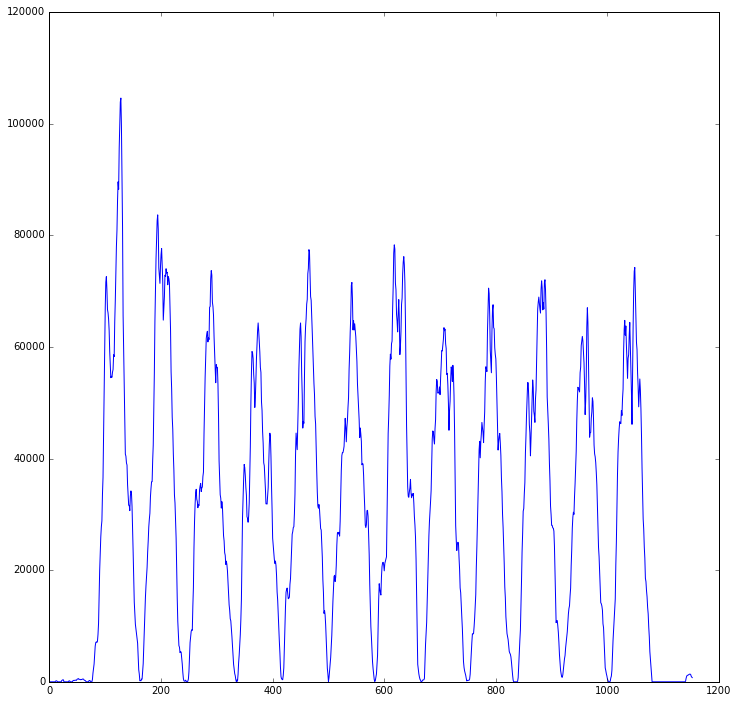

In [17]:
hist = np.sum(img_bw_not_to_zero, axis=0)
plt.figure(figsize=(12,12))
plt.plot(hist)

In [ ]:
# このhistgram のｘ軸に接する区間を最大にする回転角度が欲しい

In [1]:
# hist の値が０の要素
print(hist.count(0))

NameError: name 'hist' is not defined

In [19]:
def rotateImage(image, angle):
    image_center = tuple(np.array(image.shape)/2)
    rot_mat = cv2.getRotationMatrix2D(image_center, angle, 1.0)
    result = cv2.warpAffine(image, rot_mat, image.shape, flags=cv2.INTER_LINEAR)
    return result

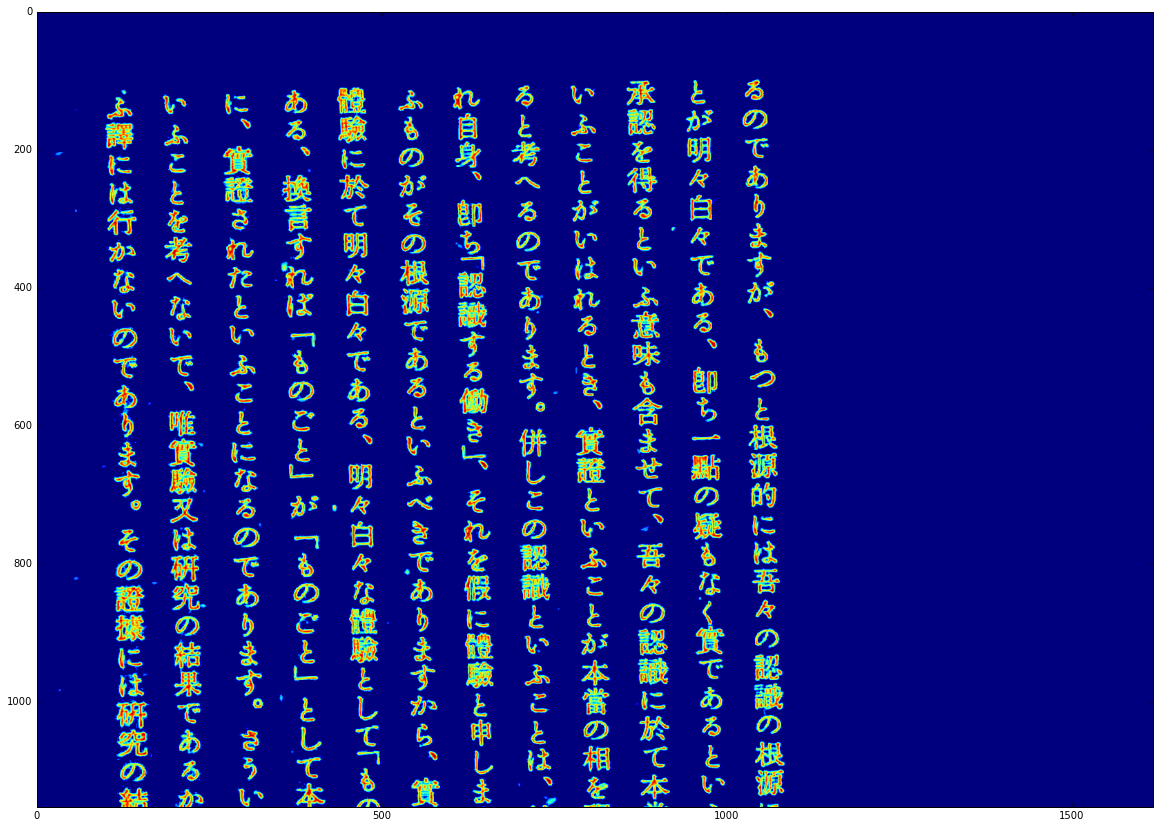

In [23]:
img_3 = rotateImage(img_bw_not_to_zero, 3)
plt.figure(figsize=(20,20))
plt.imshow(np.asarray(img_10))
plt.show()

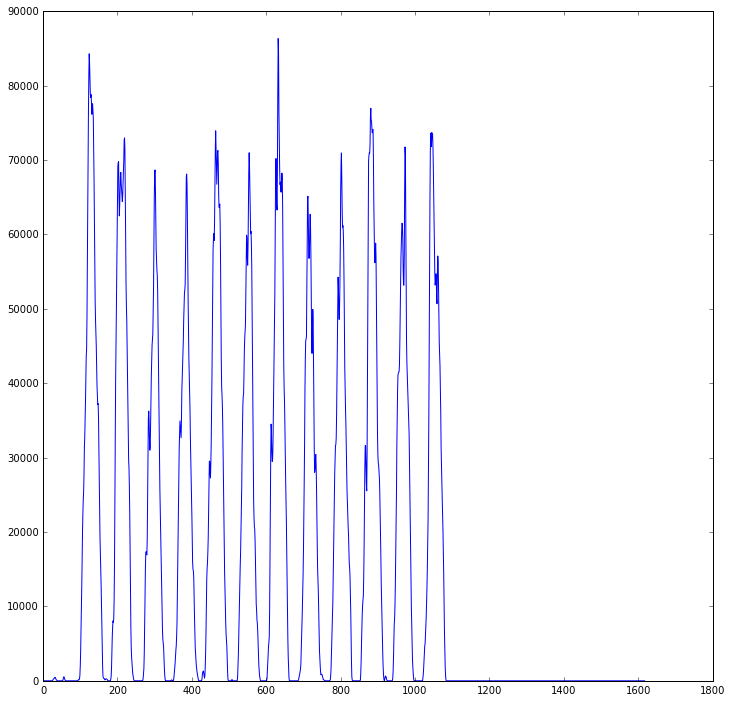

In [25]:
hist_3 = np.sum(img_3, axis=0)
plt.figure(figsize=(12,12))
plt.plot(hist_3)

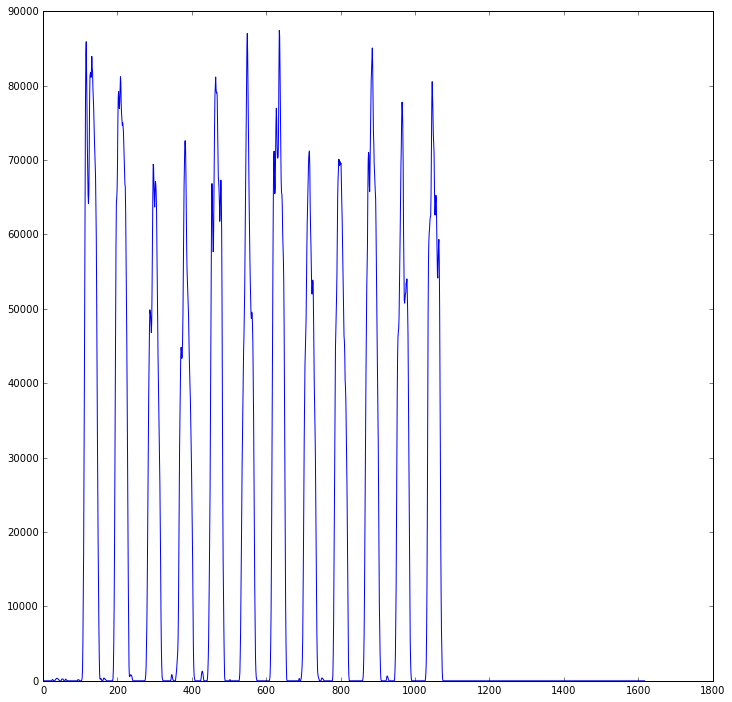

In [27]:
plt.figure(figsize=(12,12))
plt.plot(np.sum(rotateImage(img_bw_not_to_zero, 2), axis=0))